pandas statistics part 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.DataFrame({'x': 1},
                 index = [pd.Timestamp('20130101 09:00:01'),
                          pd.Timestamp('20130101 09:00:02'),
                          pd.Timestamp('20130101 09:00:03'),
                          pd.Timestamp('20130101 09:00:04'),
                          pd.Timestamp('20130101 09:00:05')]);df
                          

,x
2013-01-01 09:00:01,1
2013-01-01 09:00:02,1
2013-01-01 09:00:03,1
2013-01-01 09:00:04,1
2013-01-01 09:00:05,1


## Endpoints in time rolling windows *index is time series*

In [4]:
df["right"] = df.rolling('2s', closed='right').x.sum() #default

In [5]:
df["both"] = df.rolling('2s', closed='both').x.sum()

In [6]:
df["left"] = df.rolling('2s', closed='left').x.sum()

In [7]:
df["neither"] = df.rolling('2s', closed='neither').x.sum()

In [8]:
df

,x,right,both,left,neither
2013-01-01 09:00:01,1,1.0,1.0,NaN,NaN
2013-01-01 09:00:02,1,2.0,2.0,1.0,1.0
2013-01-01 09:00:03,1,2.0,3.0,2.0,1.0
2013-01-01 09:00:04,1,2.0,3.0,2.0,1.0
2013-01-01 09:00:05,1,2.0,3.0,2.0,1.0


centering windows

In [9]:
ser = pd.Series(np.random.randn(10), index = pd.date_range('1/1/2000', periods=10))

In [10]:
ser.rolling(window=5).mean()

2000-01-01         NaN
2000-01-02         NaN
2000-01-03         NaN
2000-01-04         NaN
2000-01-05   -0.633137
2000-01-06   -0.491410
2000-01-07   -0.721754
2000-01-08   -0.900323
2000-01-09   -0.357035
2000-01-10   -0.018247
Freq: D, dtype: float64

In [11]:
#centering keyword is available so hat the labels can be set at the center
ser.rolling(window=5, center=True).mean()

2000-01-01         NaN
2000-01-02         NaN
2000-01-03   -0.633137
2000-01-04   -0.491410
2000-01-05   -0.721754
2000-01-06   -0.900323
2000-01-07   -0.357035
2000-01-08   -0.018247
2000-01-09         NaN
2000-01-10         NaN
Freq: D, dtype: float64

### Binary windows functions i.e corr and cov

In [12]:
df = pd.DataFrame(np.random.randn(1000, 4),
    index=pd.date_range('1/1/2000', periods=1000),
    columns=['A', 'B', 'C', 'D'])

In [13]:
df = df.cumsum()

In [14]:
df2 = df[:20]

In [15]:
df2.rolling(window=5).corr(df2['B'])

,A,B,C,D
2000-01-01,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,0.401385,1.0,-0.778424,-0.549076
2000-01-06,0.228305,1.0,-0.766806,-0.636447
2000-01-07,0.283637,1.0,-0.363738,-0.022485
2000-01-08,-0.496663,1.0,-0.556700,0.236377
2000-01-09,-0.054055,1.0,-0.784193,-0.162406
2000-01-10,0.431808,1.0,-0.799238,0.195204


Computing rolling pairwise covariances and correlations

In [16]:
covs = df[['B','C','D']].rolling(window=50).cov(df[['A','B','C']],
                                               pairwise = True)

In [17]:
covs.loc['2002-09-22':]

B         C         D
2002-09-22 A  2.551753 -1.469940  2.129318
           B  9.157525 -3.934388  3.984018
           C -3.934388  6.842024 -1.854100
2002-09-23 A  2.242494 -1.465292  1.930420
           B  8.589752 -3.535756  3.738272
           C -3.535756  6.891710 -1.580678
2002-09-24 A  1.871261 -1.423926  1.685277
           B  8.047245 -3.225832  3.414265
           C -3.225832  6.899585 -1.370201
2002-09-25 A  1.550923 -1.315876  1.407193
           B  7.541810 -2.837077  3.011100
           C -2.837077  6.704540 -1.043149
2002-09-26 A  1.149899 -1.069707  0.917372
           B  7.241715 -2.615147  2.638410
           C -2.615147  6.544020 -0.768120

In [18]:
#correlation
correl = df.rolling(window=50).corr()

In [19]:
correl.loc['2002-09-22':]

A         B         C         D
2002-09-22 A  1.000000  0.382922 -0.255193  0.527639
           B  0.382922  1.000000 -0.497045  0.718403
           C -0.255193 -0.497045  1.000000 -0.386791
           D  0.527639  0.718403 -0.386791  1.000000
2002-09-23 A  1.000000  0.348590 -0.254293  0.485398
           B  0.348590  1.000000 -0.459545  0.703968
           C -0.254293 -0.459545  1.000000 -0.332317
           D  0.485398  0.703968 -0.332317  1.000000
2002-09-24 A  1.000000  0.303582 -0.249483  0.441018
           B  0.303582  1.000000 -0.432919  0.684374
           C -0.249483 -0.432919  1.000000 -0.296615
           D  0.441018  0.684374 -0.296615  1.000000
2002-09-25 A  1.000000  0.260430 -0.234352  0.389615
           B  0.260430  1.000000 -0.398978  0.658311
           C -0.234352 -0.398978  1.000000 -0.241883
           D  0.389615  0.658311 -0.241883  1.000000
2002-09-26 A  1.000000  0.193605 -0.189461  0.273399
           B  0.193605  1.000000 -0.379886  0.644904
           C -0.189461 -0.379886  1.000000 -0.197506
           D  0.273399  0.644904 -0.197506  1.000000

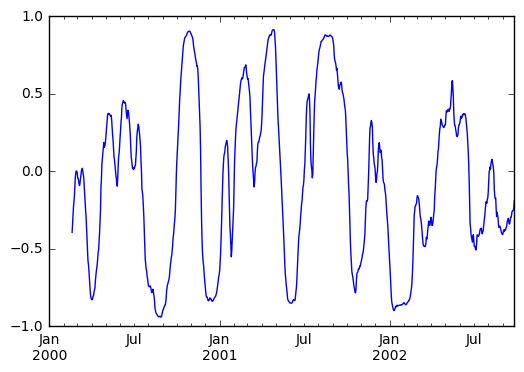

In [20]:
#retrieving time series of correlations of two columns by reshaping and indexing
correl.unstack(1)[('A','C')].plot()

In [21]:
dfa = pd.DataFrame(np.random.randn(1000,3), 
                   index = pd.date_range('1/1/2000', periods=1000),
                  columns = ['A', 'B', 'C'])

In [22]:
r = dfa.rolling(window=60, min_periods=1,)

In [23]:
r.aggregate(np.sum)

,A,B,C
2000-01-01,-0.679229,0.992070,0.728699
2000-01-02,-0.306061,1.795899,0.747357
2000-01-03,-1.941766,0.415721,0.115941
2000-01-04,-2.162048,0.697881,0.530794
2000-01-05,-0.814142,0.885107,2.082830
2000-01-06,-0.665089,0.021527,3.654013
2000-01-07,-1.178826,1.099052,4.806513
2000-01-08,-2.705213,2.950548,5.009920
2000-01-09,-1.632940,3.256047,5.735076
2000-01-10,-1.729154,5.004770,6.879981


In [24]:
r['A'].aggregate(np.sum)

2000-01-01    -0.679229
2000-01-02    -0.306061
2000-01-03    -1.941766
2000-01-04    -2.162048
2000-01-05    -0.814142
2000-01-06    -0.665089
2000-01-07    -1.178826
2000-01-08    -2.705213
2000-01-09    -1.632940
2000-01-10    -1.729154
2000-01-11    -2.341567
2000-01-12    -1.554254
2000-01-13    -1.874868
2000-01-14    -1.532807
2000-01-15    -2.428996
2000-01-16    -2.620705
2000-01-17    -2.582173
2000-01-18    -3.160085
2000-01-19    -2.566002
2000-01-20    -1.994336
2000-01-21    -2.487406
2000-01-22    -1.315891
2000-01-23    -1.805379
2000-01-24    -2.336638
2000-01-25    -2.758565
2000-01-26    -2.449695
2000-01-27    -3.664202
2000-01-28    -3.318006
2000-01-29    -3.688403
2000-01-30    -4.057363
                ...    
2002-08-28    -5.356133
2002-08-29    -6.209646
2002-08-30    -5.023516
2002-08-31    -3.092687
2002-09-01    -4.818282
2002-09-02    -7.159679
2002-09-03    -7.087208
2002-09-04    -7.333311
2002-09-05    -8.483488
2002-09-06    -8.181867
2002-09-07   -10

In [25]:
r[['A','B']].aggregate(np.sum)

,A,B
2000-01-01,-0.679229,0.992070
2000-01-02,-0.306061,1.795899
2000-01-03,-1.941766,0.415721
2000-01-04,-2.162048,0.697881
2000-01-05,-0.814142,0.885107
2000-01-06,-0.665089,0.021527
2000-01-07,-1.178826,1.099052
2000-01-08,-2.705213,2.950548
2000-01-09,-1.632940,3.256047
2000-01-10,-1.729154,5.004770


In [26]:
#applying multiple functions
r['A'].agg([np.sum, np.mean, np.std])

,sum,mean,std
2000-01-01,-0.679229,-0.679229,NaN
2000-01-02,-0.306061,-0.153030,0.744158
2000-01-03,-1.941766,-0.647255,1.004819
2000-01-04,-2.162048,-0.540512,0.847752
2000-01-05,-0.814142,-0.162828,1.119034
2000-01-06,-0.665089,-0.110848,1.008960
2000-01-07,-1.178826,-0.168404,0.933554
2000-01-08,-2.705213,-0.338152,0.988703
2000-01-09,-1.632940,-0.181438,1.037485
2000-01-10,-1.729154,-0.172915,0.978522


In [27]:
r.agg([np.mean, np.sum])

A                    B                    C          
                mean        sum      mean        sum      mean       sum
2000-01-01 -0.679229  -0.679229  0.992070   0.992070  0.728699  0.728699
2000-01-02 -0.153030  -0.306061  0.897950   1.795899  0.373678  0.747357
2000-01-03 -0.647255  -1.941766  0.138574   0.415721  0.038647  0.115941
2000-01-04 -0.540512  -2.162048  0.174470   0.697881  0.132699  0.530794
2000-01-05 -0.162828  -0.814142  0.177021   0.885107  0.416566  2.082830
2000-01-06 -0.110848  -0.665089  0.003588   0.021527  0.609002  3.654013
2000-01-07 -0.168404  -1.178826  0.157007   1.099052  0.686645  4.806513
2000-01-08 -0.338152  -2.705213  0.368818   2.950548  0.626240  5.009920
2000-01-09 -0.181438  -1.632940  0.361783   3.256047  0.637231  5.735076
2000-01-10 -0.172915  -1.729154  0.500477   5.004770  0.687998  6.879981
2000-01-11 -0.212870  -2.341567  0.517292   5.690217  0.503044  5.533484
2000-01-12 -0.129521  -1.554254  0.503576   6.042907  0.451565  5.418782
2000-01-13 -0.144221  -1.874868  0.521730   6.782495  0.408580  5.311538
2000-01-14 -0.109486  -1.532807  0.459037   6.426514  0.415481  5.816732
2000-01-15 -0.161933  -2.428996  0.471626   7.074385  0.461823  6.927351
2000-01-16 -0.163794  -2.620705  0.468760   7.500155  0.504404  8.070459
2000-01-17 -0.151893  -2.582173  0.401067   6.818136  0.482788  8.207398
2000-01-18 -0.175560  -3.160085  0.378470   6.812462  0.413278  7.439010
2000-01-19 -0.135053  -2.566002  0.360993   6.858860  0.434338  8.252422
2000-01-20 -0.099717  -1.994336  0.301698   6.033955  0.402371  8.047414
2000-01-21 -0.118448  -2.487406  0.245815   5.162123  0.397780  8.353387
2000-01-22 -0.059813  -1.315891  0.285308   6.276777  0.289031  6.358675
2000-01-23 -0.078495  -1.805379  0.213091   4.901097  0.239804  5.515496
2000-01-24 -0.097360  -2.336638  0.180349   4.328382  0.240953  5.782862
2000-01-25 -0.110343  -2.758565  0.145970   3.649241  0.241626  6.040649
2000-01-26 -0.094219  -2.449695  0.117587   3.057268  0.171560  4.460552
2000-01-27 -0.135711  -3.664202  0.119669   3.231071  0.142592  3.849988
2000-01-28 -0.118500  -3.318006  0.162640   4.553928  0.163890  4.588908
2000-01-29 -0.127186  -3.688403  0.204070   5.918032  0.171380  4.970020
2000-01-30 -0.135245  -4.057363  0.235606   7.068169  0.216791  6.503740
...              ...        ...       ...        ...       ...       ...
2002-08-28 -0.089269  -5.356133 -0.126346  -7.580746  0.095489  5.729332
2002-08-29 -0.103494  -6.209646 -0.063972  -3.838344  0.101939  6.116342
2002-08-30 -0.083725  -5.023516 -0.044558  -2.673485  0.087793  5.267562
2002-08-31 -0.051545  -3.092687  0.006070   0.364184  0.068197  4.091791
2002-09-01 -0.080305  -4.818282  0.006784   0.407019  0.112887  6.773203
2002-09-02 -0.119328  -7.159679  0.003032   0.181944  0.102750  6.165011
2002-09-03 -0.118120  -7.087208  0.049230   2.953791  0.100008  6.000473
2002-09-04 -0.122222  -7.333311  0.057700   3.461979  0.089271  5.356240
2002-09-05 -0.141391  -8.483488  0.067905   4.074270  0.022868  1.372056
2002-09-06 -0.136364  -8.181867  0.086352   5.181103  0.002471  0.148271
2002-09-07 -0.181825 -10.909525  0.136569   8.194130  0.000714  0.042832
2002-09-08 -0.204583 -12.274973  0.114681   6.880881 -0.014337 -0.860195
2002-09-09 -0.177898 -10.673907  0.101658   6.099455  0.005042  0.302526
2002-09-10 -0.156489  -9.389350  0.137508   8.250464  0.005541  0.332432
2002-09-11 -0.187836 -11.270145  0.162712   9.762708  0.047338  2.840284
2002-09-12 -0.169487 -10.169244  0.147401   8.844080  0.029749  1.784942
2002-09-13 -0.166544  -9.992667  0.146035   8.762127  0.041092  2.465520
2002-09-14 -0.143077  -8.584634  0.157785   9.467079  0.060984  3.659066
2002-09-15 -0.138571  -8.314258  0.188179  11.290716  0.046109  2.766559
2002-09-16 -0.150809  -9.048556  0.183644  11.018660  0.053948  3.236862
2002-09-17 -0.139198  -8.351851  0.135023   8.101379  0.004238  0.254295
2002-09-18 -0.128704  -7.722226  0.080853   4.851166 -0.004072 -0.244319
2002

In [28]:
#Applying diffrent functions on different columns
r.agg({'A' : 'sum', 'B' : 'std'})

,A,B
2000-01-01,-0.679229,NaN
2000-01-02,-0.306061,0.133106
2000-01-03,-1.941766,1.318641
2000-01-04,-2.162048,1.079057
2000-01-05,-0.814142,0.934508
2000-01-06,-0.665089,0.937614
2000-01-07,-1.178826,0.947292
2000-01-08,-2.705213,1.062111
2000-01-09,-1.632940,0.993738
2000-01-10,-1.729154,1.034481


In [29]:
r.agg({'A' : ['sum', 'std'], 'B' : ['mean', 'count']})

A                   B      
                  sum       std      mean count
2000-01-01  -0.679229       NaN  0.992070   1.0
2000-01-02  -0.306061  0.744158  0.897950   2.0
2000-01-03  -1.941766  1.004819  0.138574   3.0
2000-01-04  -2.162048  0.847752  0.174470   4.0
2000-01-05  -0.814142  1.119034  0.177021   5.0
2000-01-06  -0.665089  1.008960  0.003588   6.0
2000-01-07  -1.178826  0.933554  0.157007   7.0
2000-01-08  -2.705213  0.988703  0.368818   8.0
2000-01-09  -1.632940  1.037485  0.361783   9.0
2000-01-10  -1.729154  0.978522  0.500477  10.0
2000-01-11  -2.341567  0.937717  0.517292  11.0
2000-01-12  -1.554254  0.939542  0.503576  12.0
2000-01-13  -1.874868  0.901103  0.521730  13.0
2000-01-14  -1.532807  0.875453  0.459037  14.0
2000-01-15  -2.428996  0.867717  0.471626  15.0
2000-01-16  -2.620705  0.838328  0.468760  16.0
2000-01-17  -2.582173  0.813189  0.401067  17.0
2000-01-18  -3.160085  0.795274  0.378470  18.0
2000-01-19  -2.566002  0.792780  0.360993  19.0
2000-01-20  -1.994336  0.787651  0.301698  20.0
2000-01-21  -2.487406  0.772491  0.245815  21.0
2000-01-22  -1.315891  0.802473  0.285308  22.0
2000-01-23  -1.805379  0.789125  0.213091  23.0
2000-01-24  -2.336638  0.777294  0.180349  24.0
2000-01-25  -2.758565  0.763691  0.145970  25.0
2000-01-26  -2.449695  0.752765  0.117587  26.0
2000-01-27  -3.664202  0.768989  0.119669  27.0
2000-01-28  -3.318006  0.760089  0.162640  28.0
2000-01-29  -3.688403  0.747857  0.204070  29.0
2000-01-30  -4.057363  0.736175  0.235606  30.0
...               ...       ...       ...   ...
2002-08-28  -5.356133  1.096121 -0.126346  60.0
2002-08-29  -6.209646  1.100482 -0.063972  60.0
2002-08-30  -5.023516  1.110798 -0.044558  60.0
2002-08-31  -3.092687  1.144729  0.006070  60.0
2002-09-01  -4.818282  1.096570  0.006784  60.0
2002-09-02  -7.159679  1.102849  0.003032  60.0
2002-09-03  -7.087208  1.103872  0.049230  60.0
2002-09-04  -7.333311  1.105023  0.057700  60.0
2002-09-05  -8.483488  1.113219  0.067905  60.0
2002-09-06  -8.181867  1.106153  0.086352  60.0
2002-09-07 -10.909525  1.105961  0.136569  60.0
2002-09-08 -12.274973  1.064818  0.114681  60.0
2002-09-09 -10.673907  1.097244  0.101658  60.0
2002-09-10  -9.389350  1.088567  0.137508  60.0
2002-09-11 -11.270145  1.076924  0.162712  60.0
2002-09-12 -10.169244  1.091753  0.147401  60.0
2002-09-13  -9.992667  1.090909  0.146035  60.0
2002-09-14  -8.584634  1.092513  0.157785  60.0
2002-09-15  -8.314258  1.093449  0.188179  60.0
2002-09-16  -9.048556  1.090685  0.183644  60.0
2002-09-17  -8.351851  1.086507  0.135023  60.0
2002-09-18  -7.722226  1.071822  0.080853  60.0
2002-09-19  -6.394499  1.077222  0.036596  60.0
2002-09-20  -6.544870  1.075810  0.064766  60.0
2002-09-21  -5.125731  1.094096  0.029298  60.0
2002-09-22  -3.972970  1.079762  0.046273  60.0
2002-09-23  -1.681172  1.072184  0.031399  60.0
2002-09-24  -2.940938  1.078252  0.065606  60.0
2002-09-25  -2.985114  1.078929  0.059851  60.0
2002-09-26  -1.728139  1.084525  0.044757  60.0

[1000 rows x 4 columns]

## Expanding windows similar to rolling with similar   methods

In [30]:
df.expanding(min_periods=1).mean()[:5]

,A,B,C,D
2000-01-01,1.954116,-0.941884,-0.258368,-0.596272
2000-01-02,3.103172,-1.396400,-0.139459,-1.857006
2000-01-03,2.991947,-0.879102,-0.796211,-2.439820
2000-01-04,3.424894,-0.589828,-1.268921,-2.991555
2000-01-05,3.699172,-0.070601,-1.428077,-3.228037


In [31]:
#missing data in rolling and expanding use min_periods to fill values in them
sn = pd.Series([1, 2, np.nan, 3, np.nan, 4])

In [32]:
sn.rolling(2).max()

0    NaN
1    2.0
2    NaN
3    NaN
4    NaN
5    NaN
dtype: float64

In [33]:
sn.rolling(2, min_periods=1).max()

0    1.0
1    2.0
2    2.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [34]:
#in expanding in cumsum(),cumprod(),cummax(),cummin() use fillna()
sn.expanding().sum()

0     1.0
1     3.0
2     3.0
3     6.0
4     6.0
5    10.0
dtype: float64

In [35]:
sn.cumsum()

0     1.0
1     3.0
2     NaN
3     6.0
4     NaN
5    10.0
dtype: float64

In [36]:
sn.cumsum().fillna(method='ffill')

0     1.0
1     3.0
2     3.0
3     6.0
4     6.0
5    10.0
dtype: float64

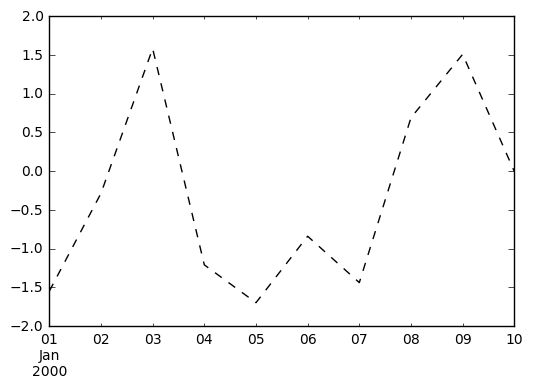

In [37]:
ser.plot(style='k--')

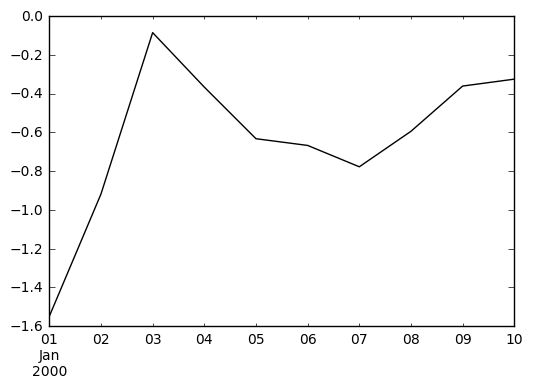

In [38]:
ser.expanding().mean().plot(style='k')

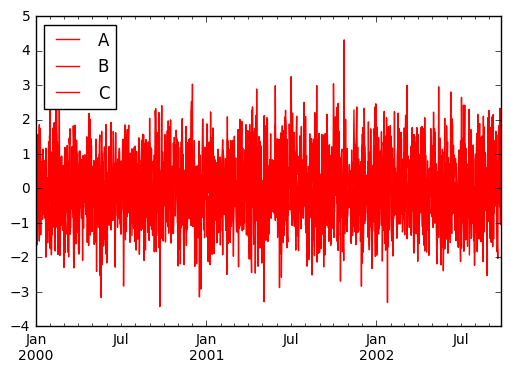

In [39]:
dfa.plot(style='r')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000053DF201BE0>,
      dtype=object)

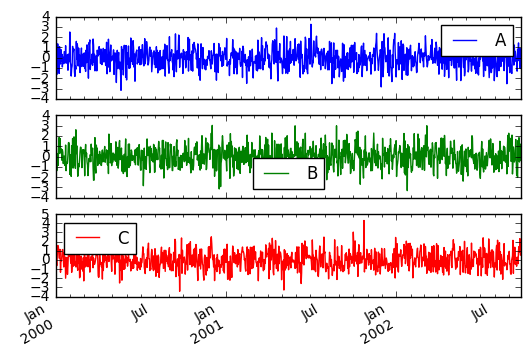

In [40]:
dfa.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000053DF3C8E48>,
      dtype=object)

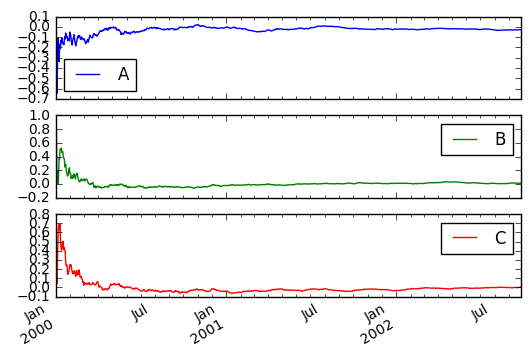

In [41]:
dfa.expanding().mean().plot(subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000053DF242400>,
      dtype=object)

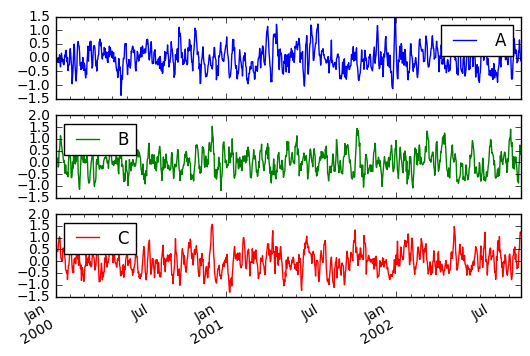

In [43]:
dfa.rolling(window=5).mean().plot(subplots=True)

## Exponentially weighted moving window aka.ewm

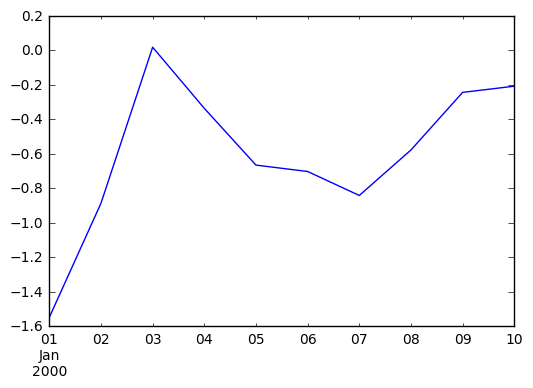

In [44]:
ser.ewm(span=20).mean().plot(style='b')

In [45]:
dfa.ewm(halflife=10).std()

,A,B,C
2000-01-01,NaN,NaN,NaN
2000-01-02,0.744158,0.133106,0.502074
2000-01-03,1.021715,1.338882,0.679313
2000-01-04,0.851853,1.078787,0.584187
2000-01-05,1.147775,0.917853,0.836706
2000-01-06,1.014506,0.919272,0.883315
2000-01-07,0.927968,0.944856,0.816152
2000-01-08,1.001679,1.085950,0.771998
2000-01-09,1.063419,0.997705,0.709011
2000-01-10,0.983915,1.042891,0.677316


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000053DDE674E0>,
      dtype=object)

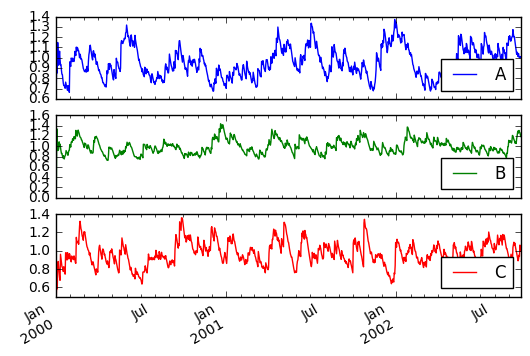

In [46]:
dfa.ewm(halflife=10).std().plot(subplots=True)